In [65]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
churn_df = pd.read_csv('telecom_churn_clean.csv')
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify = y)

In [66]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[557  13]
 [ 74  23]]


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       570
           1       0.64      0.24      0.35        97

    accuracy                           0.87       667
   macro avg       0.76      0.61      0.64       667
weighted avg       0.85      0.87      0.84       667



### Логистическая регрессия

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs

array([0.02538475, 0.2869689 , 0.13811062, 0.06772186, 0.2943153 ,
       0.1478439 , 0.02790737, 0.08117382, 0.08895971, 0.09062519,
       0.05061074, 0.09038037, 0.16387797, 0.07719755, 0.16754939,
       0.10381885, 0.07962163, 0.04706973, 0.16811459, 0.36008914,
       0.20074993, 0.02054403, 0.09402724, 0.06962598, 0.16562577,
       0.30652812, 0.05173505, 0.075993  , 0.08398342, 0.12427216,
       0.1757905 , 0.38086929, 0.2572169 , 0.0502941 , 0.27913425,
       0.1522171 , 0.18054815, 0.14231476, 0.09381644, 0.39761262,
       0.20741158, 0.093456  , 0.06059873, 0.21765796, 0.043756  ,
       0.29838317, 0.22727977, 0.06108874, 0.0882033 , 0.0788937 ,
       0.05579631, 0.31781906, 0.22923293, 0.08767167, 0.06835504,
       0.11726928, 0.1095047 , 0.02054567, 0.16290689, 0.19259557,
       0.11686867, 0.0595488 , 0.2266877 , 0.19119765, 0.16609259,
       0.1903782 , 0.08601281, 0.23260521, 0.22037155, 0.21887279,
       0.09675182, 0.17711754, 0.09661489, 0.08078278, 0.07881

### ROC-кривая

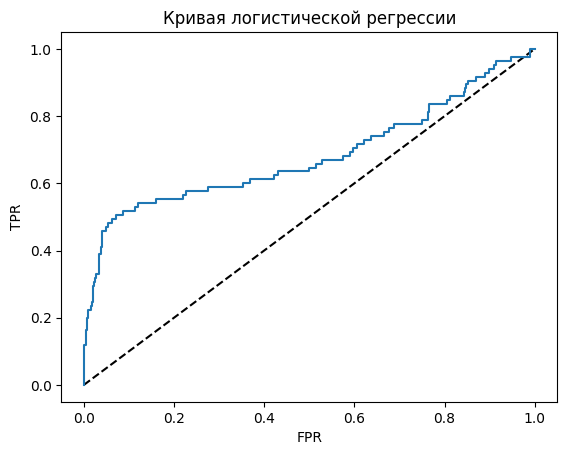

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Кривая логистической регрессии')
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.681281584798868


### Поиск по сетке кроссвалидации

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df = diabetes_df[diabetes_df['bmi'] > 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] > 0]
diabetes_df = diabetes_df[diabetes_df['insulin'] > 0]
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=13)
param_grid = {'alpha': np.linspace(0.0001, 1, 20), 'solver': ['sag', 'lsqr']}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was

{'alpha': 1.0, 'solver': 'lsqr'} 0.39339035756308327


/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [75]:
y_pred = ridge_cv.best_estimator_.predict(X_test)

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.467537627938737

In [77]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=13)
param_grid = {'alpha': np.linspace(0.0001, 1, 20), 'solver': ['sag', 'lsqr']}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=5)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 1.0} 0.39339035756308327


/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemgolubnichiy/myJupyterNotebook/.conda/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.467537627938737